In [5]:
import pandas as pd
import plotly.express as px
import seaborn as sns

In [6]:
pip install pygal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.4/130.4 kB 2.6 MB/s eta 0:00:00


In [7]:
import pygal

In [8]:
df = pd.read_csv("https://github.com/datasets/population/raw/main/data/population.csv")

In [9]:
print("First few rows of the DataFrame:")
print(df.head())

First few rows of the DataFrame:
  Country Name Country Code  Year  Value
0        Aruba          ABW  1960  54608
1        Aruba          ABW  1961  55811
2        Aruba          ABW  1962  56682
3        Aruba          ABW  1963  57475
4        Aruba          ABW  1964  58178


In [10]:
# Visualization using Plotly - line plot
fig = px.line(df, x='Year', y='Value', color='Country Name', title='Population Over Time')
fig.show()

In [11]:
# Visualization using Plotly - Scatter Plot
fig = px.scatter(df, x='Year', y='Value', color='Country Name', title='Population Over Time')
fig.show()

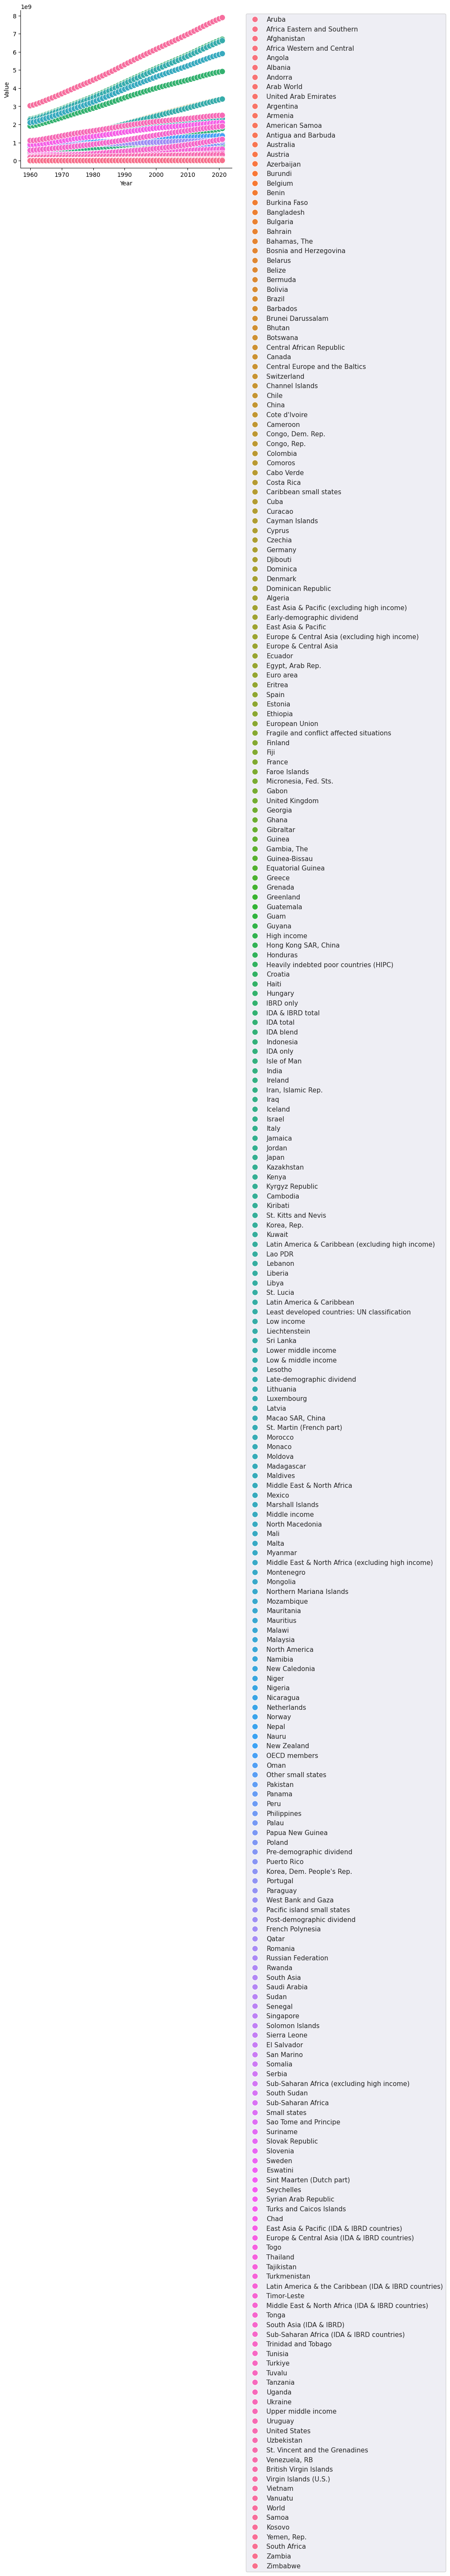

In [12]:
# Visualization using Seaborn - Scatter Plot
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x='Year', y='Value', hue='Country Name', s=100, legend='full')
sns.set(rc={'figure.figsize': (10, 6)})
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

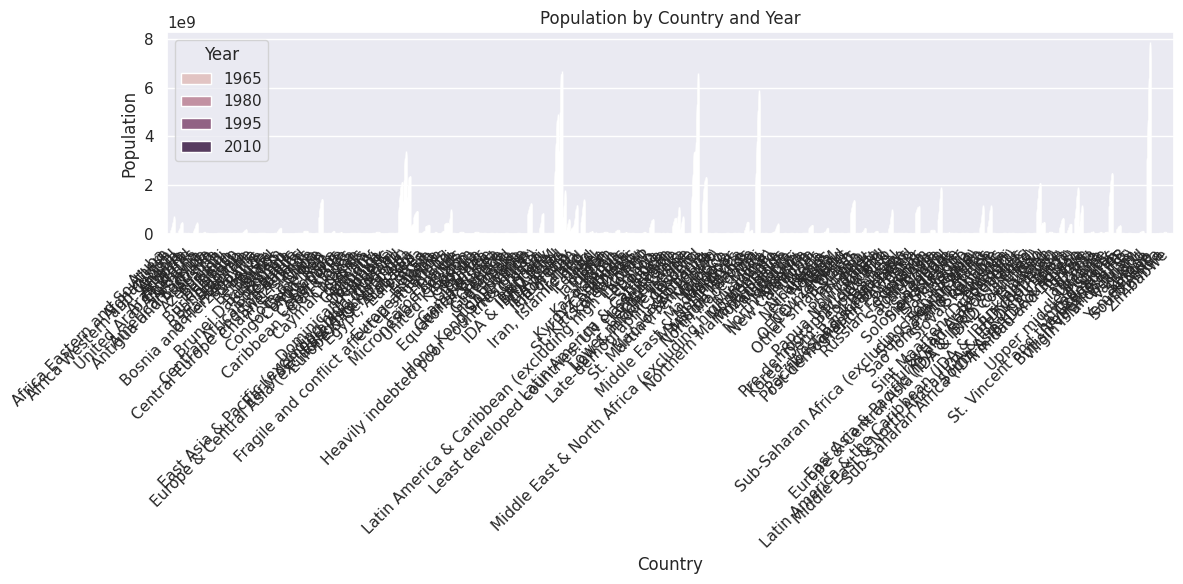

In [13]:
# Visualization using Seaborn - Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Country Name', y='Value', hue='Year')
plt.title('Population by Country and Year')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

In [1]:
from bokeh.plotting import figure, output_notebook, show
output_notebook()
p = figure(title="Population Over Time", x_axis_label='Year', y_axis_label='Value')

for country in df['Country Name'].unique():
    p.line(df[df['Country Name'] == country]['Year'], df[df['Country Name'] == country]['Value'],
           legend_label=country, line_width=2)

show(p)

NameError: name 'df' is not defined

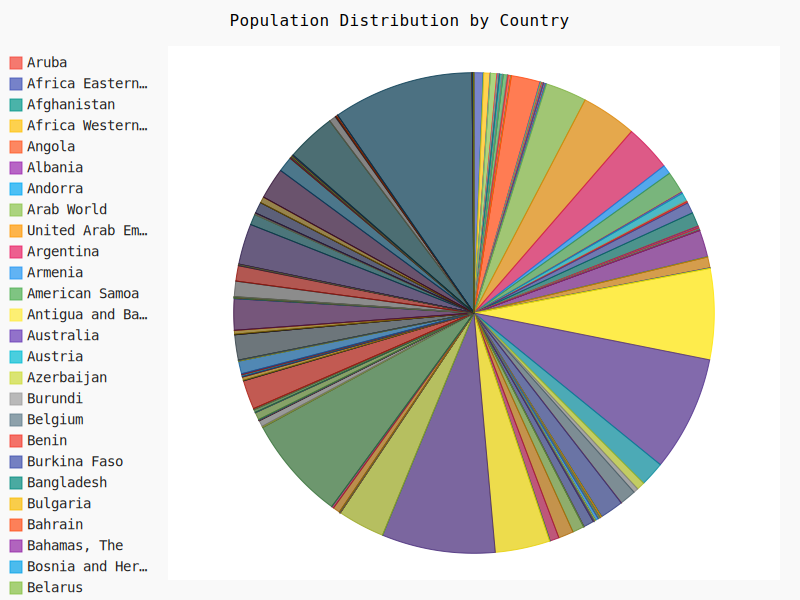

In [19]:
from IPython.display import display, SVG

# Visualization using Pygal - Pie Chart
pie_chart = pygal.Pie()
pie_chart.title = 'Population Distribution by Country'
for country in df['Country Name'].unique():
    pie_chart.add(country, df[df['Country Name'] == country]['Value'].sum())
pie_chart.render_to_file('population_pygal_pie.svg')

SVG(pie_chart.render())

In [20]:
from sklearn.linear_model import LinearRegression
X = df[['Year']].values
y = df['Value'].values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

df_vis = pd.DataFrame({'Year': df['Year'], 'Actual': y, 'Predicted': y_pred})

# Visualization using Plotly
fig = px.scatter(df_vis, x='Year', y=['Actual', 'Predicted'], title='Population Over Time (Scikit-learn)')
fig.show()
